# Lab 2: IoT Device Detection Using Machine Learning

By Bilel RAHMOUNI

## Part 1: Feature Extraction from pcap Files

#### Step 1: Upload the PcapProcessor.py File


In [ ]:
from google.colab import files
files.upload()

#### Step 2: Install tshark (Wireshark)


In [ ]:
!apt-get install tshark

#### Step 3: Set Up and Import the Python File


In [2]:
from PcapProcessor import PcapProcessor

#### Step 4: Upload Your pcap Files


In [ ]:
files.upload()

#### Step 5: Run the Feature Extraction Process


In [4]:
import os
import glob

processor = PcapProcessor(pcap_folder='/content/filtered_pcap')
processor.process()

#### Step 6: Download the Generated CSV File

In [5]:
from google.colab import files
files.download('label_feature_IOT.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can also preview a part of the csv :

In [ ]:
!pip install pandas

In [9]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/label_feature_IOT.csv')

# Display the first few rows of the DataFrame
df.head()

,Label,IPLength,IPHeaderLength,TTL,Protocol,SourcePort,DestPort,SequenceNumber,AckNumber,WindowSize,TCPHeaderLength,TCPLength,TCPStream,TCPUrgentPointer,IPFlags,IPID,IPchecksum,TCPflags,TCPChecksum
0,TCP_Camera,142,20,64,6,45739,443,1,1,2529,32,90,0,0,0x40,0xce05,0x3b90,0x0018,0x833f
1,TCP_Camera,60,20,64,6,46770,5104,0,0,5840,40,0,1,0,0x40,0x10a4,0x7e36,0x0002,0x2d43
2,TCP_Camera,142,20,64,6,55778,443,1,1,2529,32,90,2,0,0x40,0x2835,0x7172,0x0018,0xb236
3,TCP_Camera,142,20,64,6,45739,443,91,1,2529,32,90,0,0,0x40,0xce06,0x3b8f,0x0018,0xbf7a
4,TCP_Camera,142,20,64,6,55778,443,91,1,2529,32,90,2,0,0x40,0x2836,0x7171,0x0018,0x7364


Summary of the data :

In [11]:
df.describe()

,IPLength,IPHeaderLength,TTL,Protocol,SourcePort,DestPort,SequenceNumber,AckNumber,WindowSize,TCPHeaderLength,TCPLength,TCPStream,TCPUrgentPointer
count,13138.000000,13138.0,13138.000000,13138.0,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.000000,13138.0
mean,120.448013,20.0,85.239991,6.0,43630.214112,1354.488354,93658.302710,3025.156340,4440.494976,31.397777,69.050236,48.901507,0.0
std,93.499149,0.0,60.049775,0.0,16335.677809,2556.691031,109559.693507,3085.758423,8509.833017,5.009447,94.361229,102.540109,0.0
min,40.000000,20.0,64.000000,6.0,3114.000000,80.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.0
25%,60.000000,20.0,64.000000,6.0,43932.000000,443.000000,147.000000,75.000000,1689.000000,32.000000,0.000000,0.000000,0.0
50%,142.000000,20.0,64.000000,6.0,45739.000000,443.000000,33649.000000,2369.000000,2529.000000,32.000000,90.000000,2.000000,0.0
75%,142.000000,20.0,64.000000,6.0,55778.000000,443.000000,184194.500000,5403.000000,2529.000000,32.000000,90.000000,35.000000,0.0
max,2121.000000,20.0,255.000000,6.0,64272.000000,8883.000000,335407.000000,31608.000000,65535.000000,44.000000,2081.000000,500.000000,0.0


## Part 2: Exploring the Dataset Using ydata_profiling

First we need to install the required librairies :

In [ ]:
!pip install ydata-profiling

Than we import the necessary librairies

In [13]:
import pandas as pd
from ydata_profiling import ProfileReport

After that we need to load the CSV Dataset

In [14]:
df = pd.read_csv('/content/label_feature_IOT.csv')

Now, we can generate the profiling report : (the explorative=True flag adds more detail analysis options to the report)  

In [15]:
profile = ProfileReport(df, title="IoT Device Dataset Profiling Report", explorative=True)
profile.to_file("/content/IOT_dataset_profile_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Now we can download the generated report and review it

In [16]:
from google.colab import files
files.download('/content/IOT_dataset_profile_report.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Part 3: Classification of IoT Devices Using Logistic Regression and K-Nearest Neighbors

In [27]:
import pandas as pd ## Data manipulation and analysis library, used for handling the CSV file and DataFrame operations.
import numpy as np ## Numerical computing library, provides support for large, multi-dimensional arrays and matrices.
from sklearn.model_selection import train_test_split ## Function to split datasets into random train and test subsets.
from sklearn.preprocessing import StandardScaler, LabelEncoder ## Class to standardize features by removing the mean and scaling to unit variance.
from sklearn.linear_model import LogisticRegression ##  Implementation of logistic regression algorithm for classification.
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix ## Functions to compute classification metrics and confusion matrix.
import matplotlib.pyplot as plt ## Plotting library for creating static, animated, and interactive visualizations.
import seaborn as sns ##  Statistical data visualization library built on top of matplotlib, used for creating attractive and informative statistical graphics.

At first we load the dataset :

In [17]:
import pandas as pd
df = pd.read_csv('label_feature_IOT.csv')

Now we process  the data :

In [29]:
data = df

# Function to convert hexadecimal to decimal
def hex_to_decimal(hex_string):
    return int(hex_string, 16)

# Preprocess the data
data['IPFlags'] = data['IPFlags'].apply(hex_to_decimal)
data['IPID'] = data['IPID'].apply(hex_to_decimal)
data['IPchecksum'] = data['IPchecksum'].apply(hex_to_decimal)
data['TCPflags'] = data['TCPflags'].apply(hex_to_decimal)
data['TCPChecksum'] = data['TCPChecksum'].apply(hex_to_decimal)

In [33]:
# Step 2: Data Preprocessing
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

We split than the data between Features and Labels

In [34]:
# Step 4: Split the data into features (X) and labels (y)
X = df.drop('Label', axis=1)  # Features
y = df['Label']               # Labels

And than we split the dataset into a training set and a testing set. Typically, 70-
80% of the data is used for training, and 20-30% is used for testing.

In [35]:
# Step 5: Train-Test Split (using 70% train, 30% test split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

After that , we scale the features to ensure that they have similar magnitudes,
which is important for algorithms like KNN.

In [36]:
# Step 6: Feature Scaling (only for numeric columns)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Scale the training data
X_test = scaler.transform(X_test)        # Scale the testing data

We use the training data to train a Logistic Regression model

In [ ]:
# Step 7: Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

After that, we use the trained model to make predictions on the test data

In [38]:
# Make predictions using the Logistic Regression model
y_pred_lr = lr_model.predict(X_test)

In [39]:
# Step 8: K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Now we use the training data to train a K-Nearest Neighbors classifier

In [40]:
# Make predictions using the KNN model
y_pred_knn = knn_model.predict(X_test)

And now we do the evaluations :

In [46]:
# Step 9: Evaluate the Models
from sklearn.metrics import classification_report, confusion_matrix

# Ensure target_names contains strings
# If the original labels were strings like 'Assistant', 'Camera', etc., you can pass them directly
class_labels = ['Assistant', 'Camera', 'Miscellaneous', 'Mobile', 'Outlet']  # Adjust according to your dataset

# Logistic Regression evaluation
lr_report = classification_report(y_test, y_pred_lr, target_names=class_labels)
lr_confusion = confusion_matrix(y_test, y_pred_lr)
lr_accuracy = lr_model.score(X_test, y_test)

# KNN evaluation
knn_report = classification_report(y_test, y_pred_knn, target_names=class_labels)
knn_confusion = confusion_matrix(y_test, y_pred_knn)
knn_accuracy = knn_model.score(X_test, y_test)

Accuracy Comparison :

In [47]:
# Output classification reports and accuracy
print("Logistic Regression Classification Report:")
print(lr_report)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

print("\nK-Nearest Neighbors Classification Report:")
print(knn_report)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.2f}")

Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Assistant       0.91      0.95      0.93       666
       Camera       0.99      1.00      0.99      2413
Miscellaneous       0.99      0.83      0.90       283
       Mobile       0.76      0.81      0.78        58
       Outlet       1.00      1.00      1.00       522

     accuracy                           0.97      3942
    macro avg       0.93      0.92      0.92      3942
 weighted avg       0.98      0.97      0.97      3942

Logistic Regression Accuracy: 0.97

K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

    Assistant       0.97      0.99      0.98       666
       Camera       1.00      1.00      1.00      2413
Miscellaneous       1.00      0.99      0.99       283
       Mobile       0.89      0.72      0.80        58
       Outlet       1.00      1.00      1.00       522

     accuracy                           0.99    

Confusion Matrix Visualization:


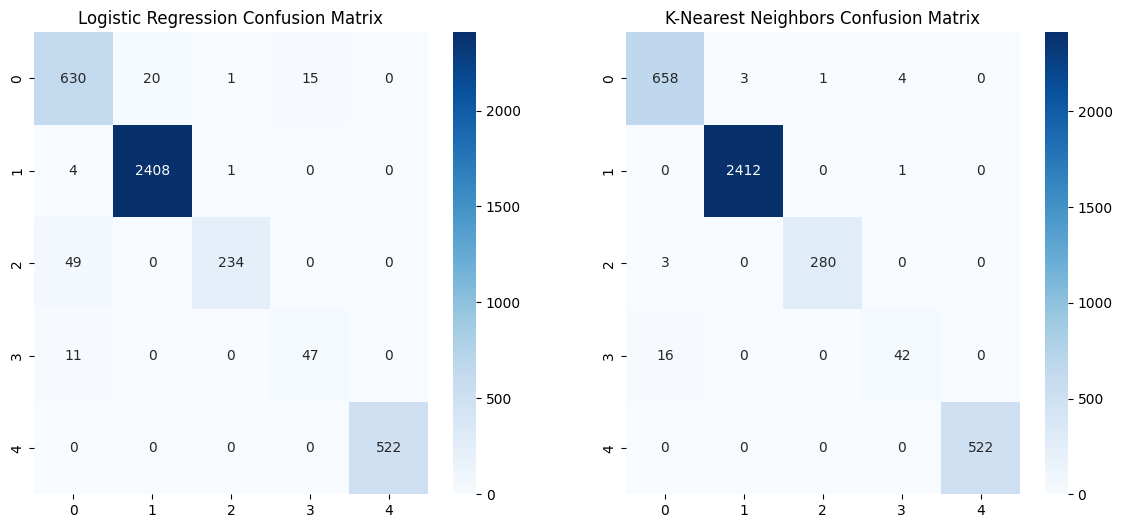

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', \
cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()